# **Desafio de Cientista de Dados - Análise e Tratamento de Dados**

## Introdução
Este notebook tem como objetivo realizar a análise e tratamento de um conjunto de dados brutos (`dados_ficha_a_desafio.csv`). O desafio envolve:

- Exploração e identificação de problemas no dataset
- Tratamento dos dados utilizando **Python e Pandas**

A descrição dos dados foi fornecida parcialmente, exigindo inferências sobre os problemas e possíveis correções.

## Descrição Geral do Dataset

O conjunto de dados analisado refere-se a um cadastro detalhado de pacientes, incluindo variáveis demográficas, socioeconômicas, dados de saúde e atendimentos médicos realizados. Os dados provavelmente têm origem em sistemas diversos, considerando campos com preenchimento manual, como ocupação, escolaridade e outros campos de texto livre, que frequentemente apresentam erros de digitação e inconsistências.

A presença de múltiplos formatos nos campos de data (com e sem milissegundos), variações nos tipos de dados em campos binários (0, 1, True, False) e pesos ou pressões arteriais incoerentes sugerem que as informações tenham sido coletadas por diferentes sistemas ou interfaces, cada qual com padrões próprios e potencialmente sem validações adequadas no momento da captura.

## **Decisões técnicas adotadas (Diretórios, Git e Branches)**

As práticas de versionamento adotadas seguem o modelo observado no projeto oficial da Secretaria Municipal de Saúde do Rio do github:

- **Branches com prefixos em inglês (`feat/`, `fix/`)** indicam o tipo de alteração.
- **Pull Requests:** em português
- **Commits individuais:** em inglês técnico
- **Branches:** em inglês técnico, usando prefixos claros (`feat/`, `fix/`)

definicao de diretorio:


```
desafio-cientista-dados/
├── data/                              # CSV original e tratado
├── notebooks/                         # Análise exploratória
│   └── analise_exploratoria.ipynb
├── models/                            # Arquivos SQL do DBT para a transformação dos dados
│   └── tratamento_dados.sql
├── README.md                          # Documentação geral do projeto
├── profiles.yml                       # Arquivo para conexão do banco de dados
├── dbt_project.yml                    # Configuração do projeto DBT
└── requirements.txt                   # Bibliotecas necessárias
```




## **Exploração e Análise dos Dados**

### Características gerais dos dados:

In [ ]:
import pandas as pd
import numpy as np

# Carregar o arquivo CSV
df = pd.read_csv("dados_ficha_a_desafio.csv")

# Visualizar as primeiras linhas
print("\n" + "="*50)
print("Primeiras 10 Linhas do DataFrame:")
print("="*50)
print(df.head(20))



Primeiras 10 Linhas do DataFrame:
                             id_paciente    sexo  obito  \
0   cd6daa6e-038d-4952-af29-579e62e07f97    male      0   
1   ad6cecb2-3a44-49ab-b2f3-6f9ffc2e2ec7    male      0   
2   54e834e7-e722-4daa-8909-cf917a1247e6    male      0   
3   c6a71e5e-0933-48d1-9d5a-8f448dc37f71  female  False   
4   d5262a3c-e5d3-4195-a46b-0acd2533e1d6    male      0   
5   4cc6a63c-61d3-49c0-807c-089c3d960956  female      0   
6   845241a6-be84-4c77-ae3a-751da1f9d434    male      0   
7   bc094be5-82fa-42b5-a22e-fa7ec64cb1fb  female      0   
8   ab4595b2-c3de-4993-91f5-dfabd8202e12    male      0   
9   cc2c75b0-4a49-4a22-9ac0-071e05e90411    male      0   
10  fe153172-1dc2-400c-8d7f-b7515ece9be0  female      0   
11  1265015b-5a6e-4b8c-8271-1c2c95371835  female      0   
12  3347541c-7478-49d7-ad3c-c549b51f26d6  female      0   
13  e9673453-0bba-4d29-8dae-cc5c0468f200  female      0   
14  c6910130-18bf-4497-909f-ff6d11cc9e5a    male      0   
15  6b987e87-8bf7-434

Minhas Observações iniciais:

1. **Campo 'ocupacao':** Verificar quantas ocupações únicas existem para determinar se os dados foram inseridos por meio de uma lista pré-definida (select) ou por um campo aberto de texto. Caso seja um campo aberto, é provável que haja profissões iguais escritas de maneiras diferentes, causando inconsistências.

2. **Campo 'obito':** Este campo apresenta diferentes valores (0, 1 e False). Precisa-se confirmar se existem três valores distintos ou apenas dois (0 e False). Analisar um campo misturando tipos de dados (string e int) é mais complexo e pode causar erros na análise. Idealmente, o campo deveria conter apenas valores inteiros (0 e 1).

3. **Campo 'ocupacao' com 'Não se aplica':** A expressão "Não se aplica" é confusa e dificulta deduzir claramente que a pessoa não possui ocupação. Recomenda-se padronizar esta informação com algo mais claro como "Sem ocupação" ou "Desempregado".

4. **Campo 'luz_eletrica':** Há inconsistências com três tipos diferentes de valores encontrados: True, 0 e 1. Este campo deve ser exclusivamente booleano (True/False). Investigar a causa desses diferentes valores (por exemplo, importação incorreta ou erro no preenchimento).

5. **Campos 'data_cadastro' e 'updated_at':** Em vários registros, esses campos possuem apenas a data, sem o horário associado.

6. **Campos 'familia_beneficiaria_auxilio_brasil' e 'crianca_matriculada_creche_pre_escola':** Estes campos também apresentam uma mistura de valores como 0, 1 e False. Para simplificar análises futuras, deve-se padronizar esses campos como booleanos (True/False) ou inteiros (0/1).

In [ ]:
# Verificar informações gerais sobre os dados
print("\n" + "="*50)
print("Informações Gerais sobre o DataFrame:")
print("="*50)
print(df.info())


Informações Gerais sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id_paciente                            100000 non-null  object 
 1   sexo                                   100000 non-null  object 
 2   obito                                  100000 non-null  object 
 3   bairro                                 100000 non-null  object 
 4   raca_cor                               100000 non-null  object 
 5   ocupacao                               100000 non-null  object 
 6   religiao                               100000 non-null  object 
 7   luz_eletrica                           100000 non-null  object 
 8   data_cadastro                          100000 non-null  object 
 9   escolaridade                           100000 non-null  object 
 10  nacionalidade     

In [ ]:
# Exibir tipos de dados
print("\n" + "="*50)
print("Tipos de Dados das Colunas:")
print("="*50)
print(df.dtypes)


Tipos de Dados das Colunas:
id_paciente                               object
sexo                                      object
obito                                     object
bairro                                    object
raca_cor                                  object
ocupacao                                  object
religiao                                  object
luz_eletrica                              object
data_cadastro                             object
escolaridade                              object
nacionalidade                             object
renda_familiar                            object
data_nascimento                           object
em_situacao_de_rua                        object
frequenta_escola                           int64
meios_transporte                          object
doencas_condicoes                         object
identidade_genero                         object
meios_comunicacao                         object
orientacao_sexual                       

O DataFrame contém 100.000 linhas de entradas, e o índice vai de 0 a 99.999. Logo, a partir da informação do Non-Null Count, eu consigo ver que em algumas colunas existem valores nulos, pois elas não chegam até 100.000 linhas de entradas.

Os campos que contêm dados nulos são:

```
17  identidade_genero                      99048 non-null   object
27  altura                                 99975 non-null   float64
28  peso                                   99816 non-null   float64
29  pressao_sistolica                      99960 non-null   float64
30  pressao_diastolica                     99983 non-null   float64

```

Outro ponto a ser observado é o Dtype, que descreve o tipo de dado de cada coluna. Algumas colunas categóricas, como a coluna sexo, atualmente são do tipo object, embora tenham um conjunto limitado de valores (apenas male/female). Converter essas colunas para o tipo category ou booleano poderia reduzir significativamente o uso de memória (atualmente em torno de 26.7 MB) e potencialmente aumentaria a performance ao realizar operações como filtragens e agregações nos dados.

In [ ]:
# Descrição estatística das colunas numéricas
print("\n" + "="*50)
print("Estatísticas Descritivas das Colunas Numéricas:")
print("="*50)
print(df.describe())



Estatísticas Descritivas das Colunas Numéricas:
       frequenta_escola        altura          peso  pressao_sistolica  \
count     100000.000000  99975.000000  99816.000000       99960.000000   
mean           0.158190    142.693589     63.801629         129.544068   
std            0.364921     38.659345     35.594173          21.406429   
min            0.000000      0.000000      0.000000           0.000000   
25%            0.000000    145.000000     50.700000         120.000000   
50%            0.000000    158.000000     67.900000         130.000000   
75%            0.000000    165.000000     82.000000         140.000000   
max            1.000000    810.000000    998.000000         900.000000   

       pressao_diastolica  n_atendimentos_atencao_primaria  \
count        99983.000000                    100000.000000   
mean            79.378207                         5.542710   
std             21.062140                         5.204464   
min              0.000000           

**Problemas identificados:**

Na descrição estatística, a coluna `min` indica que vários campos numéricos apresentam valor mínimo igual a 0. Isso significa que existem campos sem informação, possivelmente preenchidos ou configurados erroneamente como zero. O valor mínimo para as colunas **altura**, **peso**, **pressao_sistolica** e **pressao_diastolica** está fora do esperado, pois apresentam o valor 0, sendo impossível que isso seja um dado verídico nesses casos.

Sobre os valores máximos, o maior valor de entrada para altura de um paciente é 810 cm, equivalente a 8,1 metros de altura, e o peso máximo é de 998 kg, ambos humanamente impossíveis para um ser humano.

Referências para tais afirmações:

- A pessoa mais alta já registrada na história tinha 2,72 metros ([link da referência](https://pt.wikipedia.org/wiki/Sultan_K%C3%B6sen#:~:text=Sultan%20K%C3%B6sen%20(Mardin%2C%2010%20de,(8%20ft%203%20in))).
- A pessoa mais pesada registrada oficialmente chegou a 635 kg ([link da referência](https://pt.wikipedia.org/wiki/Jon_Brower_Minnoch#:~:text=Jon%20Brower%20Minnoch%20(29%20de,libras%20(ou%20635%20quilos).)).

Sobre as colunas de **pressao_sistolica** e **pressao_diastolica**, o valor mínimo de zero também não é possível, pois zero não é uma medida fisiologicamente realista. Da mesma forma, os valores máximos encontrados, como 921 mmHg para pressão diastólica e 900 mmHg para pressão sistólica, são sao extremamente elevados.

De acordo com a classificação oficial da Secretaria Municipal de Saúde do Rio de Janeiro (V Diretriz Brasileira de Hipertensão Arterial, 2006):

- **Pressão Sistólica (PAS)**:
  - Valores iguais ou superiores a 180 mmHg indicam hipertensão grave (estágio 3) e requerem atenção médica imediata.
  - Valores abaixo de 90 mmHg podem ser considerados baixos e, se acompanhados de sintomas como tontura ou desmaios, indicam hipotensão.

- **Pressão Diastólica (PAD)**:
  - Valores iguais ou superiores a 110 mmHg também caracterizam hipertensão grave e demandam intervenção médica urgente.
  - Valores abaixo de 60 mmHg podem indicar hipotensão, especialmente se houver sintomas associados.

Ou seja, valores muito abaixo ou muito acima disso seriam improváveis e provavelmente estariam ligados a algum equívoco na entrada de dados ou na medição.


Referência utilizada:

- [Classificação da Pressão Arterial - Secretaria Municipal de Saúde e Defesa Civil](https://www.rio.rj.gov.br/dlstatic/10112/123738/DLFE-1673.pdf/1.0).


Por fim, em relação ao campo **frequenta_escola**, aparentemente não há inconsistências com os dados booleanos representados por 0 e 1 (provavelmente indicando que 0 significa que o paciente não frequenta a escola e 1 indica que frequenta). Porém, no próximo tópico, decidi realizar uma correlação com os dados de escolaridade e idade para verificar a veracidade dessas informaçoes.

## **Análise Exploratória dos dados**

### **Análise de formatação de datas**

Inicialmente, verifiquei os tipos de cada coluna contendo datas com o seguinte código:

In [ ]:
colunas_datas = ['data_nascimento', 'updated_at', 'data_cadastro', 'data_atualizacao_cadastro']

print("Tipos atuais das colunas de datas:")
for coluna in colunas_datas:
    print(f"{coluna}: {df[coluna].dtype}")


Tipos atuais das colunas de datas:
data_nascimento: object
updated_at: object
data_cadastro: object
data_atualizacao_cadastro: object


Após isso, tentei converter as datas utilizando a função pd.to_datetime(df[coluna], errors='coerce') para identificar possíveis inconsistências. Porém, notei uma limitação importante nessa abordagem: valores que não seguem exatamente o mesmo formato de data identificado inicialmente são automaticamente considerados inválidos e convertidos para NaT.

Consequentemente, datas aparentemente corretas podem ser classificadas incorretamente como inválidas devido a pequenas variações, como a presença ou ausência de milissegundos.

Para investigar melhor essas variações, analisei diretamente alguns registros específicos, comparando os formatos encontrados com o seguinte código:

In [ ]:
# Pegue um exemplo específico de paciente para verificar os formatos das datas
exemplo_paciente = df.iloc[10]

# Mostrando claramente os valores e formatos de datas do paciente
for coluna in ['data_nascimento', 'updated_at', 'data_cadastro', 'data_atualizacao_cadastro']:
    valor = exemplo_paciente[coluna]
    tipo = type(valor)
    comprimento = len(str(valor))

    print(f"{coluna}: '{valor}' - tipo: {tipo}, comprimento: {comprimento}")


data_nascimento: '1997-02-06' - tipo: <class 'str'>, comprimento: 10
updated_at: '2022-07-01 00:16:02.133' - tipo: <class 'str'>, comprimento: 23
data_cadastro: '2022-11-23 09:51:47.917' - tipo: <class 'str'>, comprimento: 23
data_atualizacao_cadastro: '2021-03-26 21:55:16' - tipo: <class 'str'>, comprimento: 19


In [ ]:
# Pegue um exemplo específico de paciente para verificar os formatos das datas
exemplo_paciente = df.iloc[1]

# Mostrando claramente os valores e formatos de datas do paciente
for coluna in ['data_nascimento', 'updated_at', 'data_cadastro', 'data_atualizacao_cadastro']:
    valor = exemplo_paciente[coluna]
    tipo = type(valor)
    comprimento = len(str(valor))

    print(f"{coluna}: '{valor}' - tipo: {tipo}, comprimento: {comprimento}")


data_nascimento: '1952-12-20' - tipo: <class 'str'>, comprimento: 10
updated_at: '2020-06-25 00:00:00.000' - tipo: <class 'str'>, comprimento: 23
data_cadastro: '2021-01-07 00:00:00.000' - tipo: <class 'str'>, comprimento: 23
data_atualizacao_cadastro: '2022-07-10 17:48:09.600' - tipo: <class 'str'>, comprimento: 23


Com esses exemplos, foi possível observar que algumas datas possuem milissegundos e outras não. A consequência disso é que, ao tentar a conversão automática com o Pandas, ele escolhe o primeiro formato encontrado como padrão (por exemplo as entradas com milissegundos) e espera que todas as entradas seguintes estejam no mesmo formato. Caso encontre datas sem milissegundos posteriormente, elas são consideradas incorretas e transformadas em NaT.

Para verificar explicitamente essa variação nos formatos das datas, utilizei o seguinte código para destacar os padrões distintos encontrados:

In [ ]:
import pandas as pd

colunas_datas = ['data_nascimento', 'updated_at', 'data_cadastro', 'data_atualizacao_cadastro']

# Função para substituir dígitos por placeholders e revelar o formato
def revelar_formato(data_str):
    import re
    formato = re.sub(r'\d', 'D', data_str)  # substitui dígitos por 'D'
    return formato

# Analisando formatos em cada coluna
for coluna in colunas_datas:
    print(f"\nFormatos encontrados na coluna '{coluna}':")

    # Remover valores nulos para evitar erros
    valores_nao_nulos = df[coluna].dropna().astype(str)

    # Aplicar função para revelar formatos diferentes
    formatos_unicos = valores_nao_nulos.apply(revelar_formato).value_counts()

    print(formatos_unicos)



Formatos encontrados na coluna 'data_nascimento':
data_nascimento
DDDD-DD-DD    100000
Name: count, dtype: int64

Formatos encontrados na coluna 'updated_at':
updated_at
DDDD-DD-DD DD:DD:DD.DDD    92145
DDDD-DD-DD DD:DD:DD         7855
Name: count, dtype: int64

Formatos encontrados na coluna 'data_cadastro':
data_cadastro
DDDD-DD-DD DD:DD:DD.DDD    63446
DDDD-DD-DD DD:DD:DD        36554
Name: count, dtype: int64

Formatos encontrados na coluna 'data_atualizacao_cadastro':
data_atualizacao_cadastro
DDDD-DD-DD DD:DD:DD.DDD    71310
DDDD-DD-DD DD:DD:DD        28690
Name: count, dtype: int64


Essa análise mostra que há inconsistências no formato das datas capturadas, especialmente na presença ou ausência de milissegundos. Essas inconsistências dificultam uma conversão automática padrão pelo Pandas, pois este interpreta o primeiro formato encontrado como padrão absoluto, classificando quaisquer variações posteriores como inválidas.

Como meu objetivo nesta etapa é apenas identificar esses formatos diferentes ou inconsistentes sem realizar conversões definitivas (uma vez que a padronização será feita posteriormente no DBT), essa abordagem foi suficiente para demonstrar claramente a diversidade de formatos existentes.

### **Verificacao da datas com hora zerada**



In [ ]:
colunas_datas = ['updated_at', 'data_cadastro', 'data_atualizacao_cadastro']

for coluna in colunas_datas:
    datas_zeradas = df[df[coluna].astype(str).str.contains('00:00:00(?:\.000)?', regex=True)]
    qtd_datas_zeradas = len(datas_zeradas)

    print(f"\nColuna '{coluna}' possui {qtd_datas_zeradas} entradas com horário zerado.")
    if qtd_datas_zeradas > 0:
        print("Exemplos encontrados:")
        print(datas_zeradas[['id_paciente', coluna]].head(5))


Coluna 'updated_at' possui 34633 entradas com horário zerado.
Exemplos encontrados:
                            id_paciente               updated_at
0  cd6daa6e-038d-4952-af29-579e62e07f97  2021-06-01 00:00:00.000
1  ad6cecb2-3a44-49ab-b2f3-6f9ffc2e2ec7  2020-06-25 00:00:00.000
2  54e834e7-e722-4daa-8909-cf917a1247e6  2020-03-02 00:00:00.000
4  d5262a3c-e5d3-4195-a46b-0acd2533e1d6  2020-11-11 00:00:00.000
6  845241a6-be84-4c77-ae3a-751da1f9d434  1900-01-01 00:00:00.000

Coluna 'data_cadastro' possui 29506 entradas com horário zerado.
Exemplos encontrados:
                            id_paciente            data_cadastro
0  cd6daa6e-038d-4952-af29-579e62e07f97  2021-06-24 00:00:00.000
1  ad6cecb2-3a44-49ab-b2f3-6f9ffc2e2ec7  2021-01-07 00:00:00.000
2  54e834e7-e722-4daa-8909-cf917a1247e6  2021-02-18 00:00:00.000
5  4cc6a63c-61d3-49c0-807c-089c3d960956  2021-05-13 00:00:00.000
8  ab4595b2-c3de-4993-91f5-dfabd8202e12  2021-10-06 00:00:00.000

Coluna 'data_atualizacao_cadastro' possui 1460

Observei que alguns registros possuem horários zerados (`'00:00:00'`). Acredito que o sistema ou o dispositivo responsável pela captura dos dados registrou apenas a data, sem salvar ou capturar o horário exato do evento. Em casos como esse, o banco de dados acaba preenchendo automaticamente o horário com zeros, mantendo o formato. É comum em sistemas mais antigos onde a coleta dos dados ocorre em lotes ou sem precisão exata de horário, e isso gera registros com horários zerados.

### **Análise dos valores nulos**

Já sabia que existiam valores nulos pelas informacoes iniciais da planilha, mas com esta análise é possível quantificar melhor quais são as colunas afetadas e a quantidade exata de dados ausentes em cada uma delas.

Colunas com valores ausentes e quantidades:
identidade_genero     952
altura                 25
peso                  184
pressao_sistolica      40
pressao_diastolica     17
dtype: int64


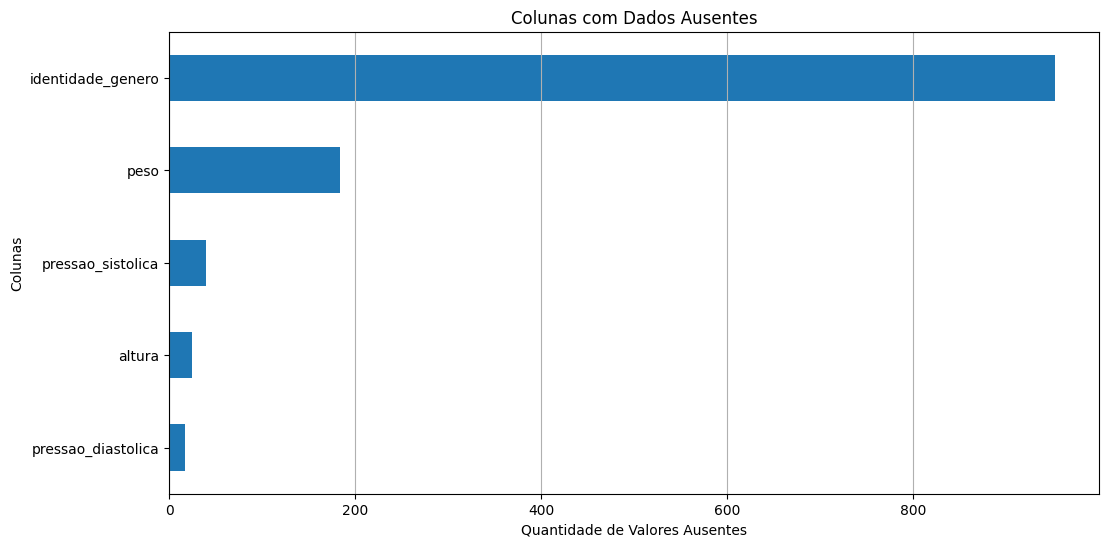

In [ ]:
# Verificando colunas com valores ausentes (NaN ou vazios)
colunas_ausentes = df.columns[df.isnull().any()]
print("Colunas com valores ausentes e quantidades:")
print(df[colunas_ausentes].isnull().sum())

# Gráfico em barras das colunas com dados ausentes
import matplotlib.pyplot as plt

# Calculando valores ausentes por coluna
dados_ausentes = df.isnull().sum()
dados_ausentes = dados_ausentes[dados_ausentes > 0]

# Gráfico
plt.figure(figsize=(12, 6))
dados_ausentes.sort_values().plot(kind='barh')
plt.title('Colunas com Dados Ausentes')
plt.xlabel('Quantidade de Valores Ausentes')
plt.ylabel('Colunas')
plt.grid(axis='x')
plt.show()

Esses valores têm uma grande recorrência de campos nulos porque provavelmente não são campos obrigatórios no preenchimento das fichas e atendimentos médicos. Por exemplo, no campo de identidade de gênero, muitos pacientes podem escolher por não responder. E as métrica de peso, altura e pressão também são usadas em contextos médicos específicos e não são obrigatórias para todos os casos.

### **Análise tipo de dado incosistente para inteiros**

Durante a exploração inicial dos dados, percebi que seria importante analisar a consistência dos tipos dos dados nas colunas que deveriam ser exclusivamente numéricas, como peso, altura e pressão arterial. Decidi fazer essa verificação porque, muitas vezes, campos declarados como numéricos acabam recebendo valores não numéricos devido a erros no preenchimento das fichas ou inserção incorreta dos dados no sistema, por exemplo, textos indicando valores não informados.

Dessa forma, selecionei apenas as colunas do conjunto de dados identificadas pelo tipo numérico (inteiro ou decimal). Em seguida, verifiquei se existiam valores que não correspondiam ao tipo esperado, ou seja, valores que não fossem números inteiros ou decimais e que também não fossem nulos.

In [ ]:
# Identificando inconsistências em colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Função para verificar valores não numéricos em colunas numéricas
inconsistencias = {}
for coluna in colunas_numericas:
    inconsistentes = df[~df[coluna].apply(lambda x: isinstance(x, (int, float))) & df[coluna].notnull()]
    if not inconsistentes.empty:
        inconsistencias[coluna] = inconsistentes

# Exibindo resultados
if inconsistencias:
    for coluna, casos in inconsistencias.items():
        print(f"Inconsistências encontradas na coluna '{coluna}':")
        print(casos[[coluna]].head())
        print(f"Total de inconsistências: {len(casos)}\n")
else:
    print("Não foram encontradas inconsistências nas colunas numéricas.")

Não foram encontradas inconsistências nas colunas numéricas.


### **Análise dos valores numéricos negativos**

Outro aspecto importante é verificar a presença de valores numéricos negativos em campos que, por definição, deveriam conter apenas valores positivos ou zero. Valores negativos nesses campos podem indicar erros de preenchimento ou problemas durante a importação dos dados, o que pode comprometer a qualidade e a confiabilidade das análises subsequentes.

Para realizar essa verificação, selecionei todas as colunas numéricas e verifiquei individualmente a presença de valores negativos.

In [ ]:
# Seleciona automaticamente as colunas numéricas do DataFrame
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Verifica valores negativos nas colunas numéricas
for coluna in colunas_numericas:
    negativos = df[df[coluna] < 0]
    qtd_negativos = len(negativos)

    if qtd_negativos > 0:
        print(f"\nColuna '{coluna}' possui {qtd_negativos} valores negativos.")
        print(negativos[['id_paciente', coluna]].head(5))
    else:
        print(f"\nColuna '{coluna}' não possui valores negativos.")



Coluna 'frequenta_escola' não possui valores negativos.

Coluna 'altura' não possui valores negativos.

Coluna 'peso' não possui valores negativos.

Coluna 'pressao_sistolica' não possui valores negativos.

Coluna 'pressao_diastolica' não possui valores negativos.

Coluna 'n_atendimentos_atencao_primaria' não possui valores negativos.

Coluna 'n_atendimentos_hospital' não possui valores negativos.


### **Análise de duplicatas**

Aqui nessa parte o objetivo era verificar a existência de registros duplicados, pois em alguns casos podem ocorrer entradas repetidas que comprometem a confiabilidade dos resultados finais, especialmente em contextos médicos, onde a duplicidade de informações pode levar a interpretações erradas ou análises estatísticas enviesadas.

In [ ]:
# Contar duplicatas
print("\n" + "="*50)
print("Número de Duplicatas:")
print("="*50)
print(df.duplicated().sum())


Número de Duplicatas:
0


### **Verificação da consistência da Pressão Arterial por Faixa Etária**

Devido às diferenças fisiológicas naturais, decidi analisar os valores de pressão arterial dividindo os pacientes em grupos etários específicos:

| Faixa Etária                        | Limite Sistólica (mmHg) | Limite Diastólica (mmHg) |
|-------------------------------------|-------------------------|--------------------------|
| Crianças (0-12 anos)                | 80 – 120                | 50 – 80                  |
| Adolescentes e adultos (13-60 anos) | 90 – 180                | 60 – 120                 |
| Idosos (acima de 60 anos)           | 90 – 200                | 60 – 120                 |

Para uma análise de casos absurdos, com valores contendo erros evidentes de registro, utilizo os seguintes intervalos extremos, considerando uma boa margem para não descartar casos reais, ainda que raros ou patológicos:


| Faixa Etária                        | Sistólica (mmHg) - Valores absurdos | Diastólica (mmHg) - Valores absurdos |
|-------------------------------------|-------------------------------------|--------------------------------------|
| Crianças (0-12 anos)                | < 50 ou > 180                       | < 30 ou > 120                        |
| Adolescentes e adultos (13-60 anos) | < 50 ou > 280                       | < 30 ou > 160                        |
| Idosos (acima de 60 anos)           | < 50 ou > 280                       | < 30 ou > 160                        |

In [ ]:
# Primeiro, converta as colunas para formato datetime

df['data_nascimento'] = pd.to_datetime(df['data_nascimento'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')

# Remova registros com datas faltantes antes de calcular a idade
df_validas = df.dropna(subset=['data_nascimento', 'updated_at']).copy()

# Calcular idade com segurança
df_validas['idade'] = ((df_validas['updated_at'] - df_validas['data_nascimento']).dt.days / 365.25).astype(int)

# Crie a faixa etária
def faixa_etaria(idade):
    if idade <= 12:
        return 'Criança'
    elif idade <= 60:
        return 'Adulto'
    else:
        return 'Idoso'

df_validas['faixa_etaria'] = df_validas['idade'].apply(faixa_etaria)

# Aplicando o filtro com base nos intervalos absurdos por faixa etária
casos_absurdos_pressao = df_validas[
    ((df_validas['faixa_etaria'] == 'Criança') &
        ((df_validas['pressao_sistolica'] < 50) | (df_validas['pressao_sistolica'] > 180) |
         (df_validas['pressao_diastolica'] < 30) | (df_validas['pressao_diastolica'] > 120))) |

    ((df_validas['faixa_etaria'] == 'Adulto') &
        ((df_validas['pressao_sistolica'] < 50) | (df_validas['pressao_sistolica'] > 280) |
         (df_validas['pressao_diastolica'] < 30) | (df_validas['pressao_diastolica'] > 160))) |

    ((df_validas['faixa_etaria'] == 'Idoso') &
        ((df_validas['pressao_sistolica'] < 50) | (df_validas['pressao_sistolica'] > 280) |
         (df_validas['pressao_diastolica'] < 30) | (df_validas['pressao_diastolica'] > 160)))
]

# Exibindo exemplos desses casos absurdos claramente
print("Exemplos de casos absurdos por faixa etária:")
print(casos_absurdos_pressao[['id_paciente', 'idade', 'faixa_etaria', 'pressao_sistolica', 'pressao_diastolica']].head(10))

# Contagem total dos casos absurdos encontrados
print(f"\nTotal de casos absurdos encontrados: {len(casos_absurdos_pressao)}")

Exemplos de casos absurdos por faixa etária:
                              id_paciente  idade faixa_etaria  \
89   6a833e9f-cbbd-4b78-96a3-efd61ac1d247     56       Adulto   
216  754f3325-410e-4280-a27a-0d17233876ff      0      Criança   
245  d71ce4e1-ec8e-48a1-9b89-dc3ab114d840     75        Idoso   
332  43c6bdaa-1673-4a6a-8b20-ff7f5bfe39b4     40       Adulto   
492  4fd819e8-66e4-4d74-b2b3-d3829b238934      0      Criança   
578  2c082355-aa4b-4fa0-8e5a-ed66ca12e713     11      Criança   
627  8c6bafab-4100-47a5-be91-7c74316cb67d      0      Criança   
779  151e73e1-a0ee-492d-99b2-f9c73628560c     31       Adulto   
893  7100a1ed-15cb-43d1-920d-8bb1de0bc142     36       Adulto   
978  51488f7e-4039-4845-9681-c5f897b5db64      3      Criança   

     pressao_sistolica  pressao_diastolica  
89               415.0                90.0  
216              220.0                84.0  
245              100.0                 7.0  
332              130.0                10.0  
492           

Portanto, valores fora desses intervalos indicam erros de medição ou registro e devem ser reportados aos fornecedores.

### **Investigando casos isolados que apareceram nas estatisticas**

Investigando o caso do paciente com o máximo anual de atendimentos hospitalares igual a 77, conforme verifiquei nas informações estatísticas, encontrei outros possíveis erros.

In [ ]:
# Encontrar paciente com exatamente 77 atendimentos
paciente_77 = df[df['n_atendimentos_hospital'] == 77]

print("Dados completos do paciente com 77 atendimentos hospitalares:")
print(paciente_77)


Dados completos do paciente com 77 atendimentos hospitalares:
                               id_paciente    sexo obito  bairro raca_cor  \
3119  f181a3b2-cc9a-44fa-a549-6662c6cd665f  female     0  Centro    Parda   

                    ocupacao      religiao luz_eletrica  \
3119  Administrador de Redes  Sem religião            1   

                data_cadastro    escolaridade  ...  \
3119  2019-03-01 00:00:00.000  Médio Completo  ...   

     familia_beneficiaria_auxilio_brasil  \
3119                                   0   

     crianca_matriculada_creche_pre_escola altura  peso  pressao_sistolica  \
3119                                     0  173.0  9.49              120.0   

     pressao_diastolica n_atendimentos_atencao_primaria  \
3119               90.0                              15   

     n_atendimentos_hospital              updated_at       tipo  
3119                      77 2023-12-14 17:35:46.177  historico  

[1 rows x 35 columns]


Os dados desse paciente apresentam erros relacionados ao campo **peso**, que está registrado como **9.49 kg**, um valor que não faz sentido para um adulto com altura de **173 cm**. Esse valor é extremamente baixo e inconsistente, indicando claramente um erro de digitação ou na importação dos dados.

Acredito ser importante comunicar ao fornecedor sobre esse problema, solicitando que revise seus procedimentos de validação para evitar erros semelhantes no futuro, após termos certeza de que o erro não ocorreu durante a importação dos dados.

### **Verificação da consistência do peso por Faixa Etária**

Devido aos erros no peso identificados no paciente com o número máximo de 77 atendimentos hospitalares, decidi analisar também os pesos de todo o dataset, dividindo os pacientes por faixas etárias específicas. Para identificar erros evidentes nos registros, utilizei intervalos extremos amplos, evitando descartar casos raros, mas possíveis:


| Faixa Etária                        | Peso corporal (kg) - Valores absurdos |
|-------------------------------------|--------------------------------------|
| Crianças (0-12 anos)                | < 3 kg ou > 80 kg                     |
| Adolescentes e adultos (13-60 anos) | < 30 kg ou > 250 kg                   |
| Idosos (acima de 60 anos)           | < 30 kg ou > 200 kg                   |


In [ ]:
# Aplicando o filtro com base nos intervalos absurdos por faixa etária
casos_absurdos_peso = df_validas[
    ((df_validas['faixa_etaria'] == 'Criança') &
        ((df_validas['peso'] < 3) | (df_validas['peso'] > 80))) |

    ((df_validas['faixa_etaria'] == 'Adulto') &
        ((df_validas['peso'] < 30) | (df_validas['peso'] > 250))) |

    ((df_validas['faixa_etaria'] == 'Idoso') &
        ((df_validas['peso'] < 30) | (df_validas['peso'] > 200)))
]

# Exibindo exemplos desses casos absurdos claramente
print("Exemplos de casos absurdos de peso por faixa etária:")
print(casos_absurdos_peso[['id_paciente', 'idade', 'faixa_etaria', 'peso']].head(10))

# Contagem total dos casos absurdos encontrados
print(f"\nTotal de casos absurdos de peso encontrados: {len(casos_absurdos_peso)}")


Exemplos de casos absurdos de peso por faixa etária:
                             id_paciente  idade faixa_etaria   peso
4   d5262a3c-e5d3-4195-a46b-0acd2533e1d6     49       Adulto   8.50
17  42ed411c-5f8b-421b-8ac9-9311f2e6ec31     70        Idoso  15.00
18  ee7fa9aa-aec6-47f5-9270-e2a596a1245c     29       Adulto   3.59
19  eac383b4-b78b-4e0e-bf08-2a61d4b2f8cd     19       Adulto  19.20
20  6d9738d8-e913-4257-873d-c8b68d5d6ef8     40       Adulto  23.00
22  122c778f-3f7f-426b-9f34-38cfc48d55d4      6      Criança  87.70
23  4d8653e9-c146-4931-853b-952603a43b4d     60       Adulto  15.00
31  516d1ce6-c059-43d2-90b6-ea9f83db4d14     65        Idoso   8.54
36  70847afc-3dd2-4097-bd56-3bbcc927f9f2     40       Adulto  16.35
39  e0e3a7cb-e107-4543-9f2c-89265ee7e5fa      7      Criança  97.90

Total de casos absurdos de peso encontrados: 18186


Indo mais a fundo, trago um exemplo específico: no caso do paciente abaixo, trata-se claramente de um adulto, já que possui escolaridade "Médio Completo", profissão, utiliza meios de transporte comuns, porém seu peso foi cadastrado como 8.5 kg. Suponho que tenha ocorrido um erro de digitação e que o peso correto talvez seja 85 kg (avalio em kg porque é a metrica comum mais utilizada):

In [ ]:
id_procurado = 'd5262a3c-e5d3-4195-a46b-0acd2533e1d6'

dados_paciente = df[df['id_paciente'] == id_procurado]
print(dados_paciente.T)

                                                                              4
id_paciente                                d5262a3c-e5d3-4195-a46b-0acd2533e1d6
sexo                                                                       male
obito                                                                         0
bairro                                                               Santíssimo
raca_cor                                                                 Branca
ocupacao                                                    Técnico Eletricista
religiao                                                                  Outra
luz_eletrica                                                               True
data_cadastro                                               2022-12-13 18:30:45
escolaridade                                                     Médio Completo
nacionalidade                                                        Brasileira
renda_familiar                          

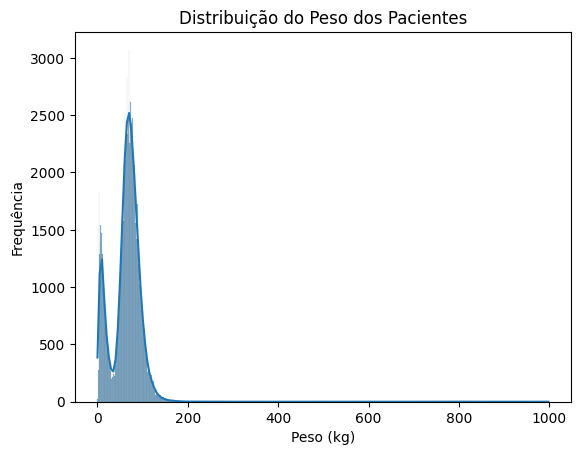

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['peso'].dropna(), kde=True)
plt.title('Distribuição do Peso dos Pacientes')
plt.xlabel('Peso (kg)')
plt.ylabel('Frequência')
plt.show()

### **Verificação da consistência: `frequenta_escola`**

Para verificar a consistência desses dados, cruzei a variável `frequenta_escola` com a idade dos pacientes calculada a partir da data de nascimento. Considerei inconsistencias os seguintes casos:

- Pessoas com menos de 3 anos frequentando escola

Foi considerado **inconsistente** qualquer caso onde crianças menores de 3 anos estejam com níveis educacionais impossíveis para sua idade, como:

- Fundamental (Completo/Incompleto)
- Médio (Completo/Incompleto)
- Superior (Completo/Incompleto)

Embora exista a possibilidade remota de crianças pequenas (2 a 4 anos) reconhecerem letras e palavras simples, a alfabetização formal e oficial acontece normalmente após os 5 anos. Por esse motivo, os registros de crianças abaixo de 3 anos classificadas como "Alfabetizado" podem ser **potenciais inconsistências**.
Referencia: https://agenciabrasil.ebc.com.br/educacao/noticia/2019-08/governo-lanca-cartilha-da-politica-nacional-da-alfabetizacao?utm_source=chatgpt.com

In [ ]:
import pandas as pd

# Converte corretamente as colunas para formato datetime
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')

# Filtra dados com datas válidas antes do cálculo da idade
df_validas = df.dropna(subset=['data_nascimento', 'updated_at']).copy()

# Remove datas claramente incorretas (como registros de 1900)
df_validas = df_validas[df_validas['updated_at'].dt.year > 1900]

# Calcula a idade corretamente usando apenas datas válidas
df_validas['idade'] = (df_validas['updated_at'] - df_validas['data_nascimento']).dt.days // 365

# Escolaridades incoerentes para crianças abaixo de 3 anos
escolaridade_incoerente = [
    'Médio Completo', 'Médio Incompleto',
    'Fundamental Completo', 'Fundamental Incompleto',
    'Superior completo', 'Superior incompleto',
    'Alfabetizado'
]

# Identifica inconsistências: crianças menores de 3 anos frequentando escola com escolaridade incoerente
inconsistentes_idade_baixa = df_validas[
    (df_validas['frequenta_escola'] == 1) &
    (df_validas['idade'] < 3) &
    (df_validas['idade'] >= 0) &  # Garante que a idade não seja negativa
    (df_validas['escolaridade'].isin(escolaridade_incoerente))
]

# Resultados
print("Casos com idade abaixo de 3 anos e escolaridade incoerente:")
print(inconsistentes_idade_baixa[['id_paciente', 'idade', 'frequenta_escola', 'escolaridade']])

num_inconsistencias = inconsistentes_idade_baixa.shape[0]
print(f"Total de inconsistências encontradas: {num_inconsistencias}")

Casos com idade abaixo de 3 anos e escolaridade incoerente:
                                id_paciente  idade  frequenta_escola  \
687    1e05b347-ea8e-4467-9ccb-22b534f60db7      1                 1   
743    278a6b5d-eb5e-41b6-9c7d-08a5550b034a      0                 1   
825    c8eb2f56-a6a3-4bf5-b948-77c672a1aea6      1                 1   
1003   7aa4b388-70ff-444b-bfc7-103c7fc45890      2                 1   
1040   f734f243-6b9d-4a28-a338-746ad839998a      2                 1   
...                                     ...    ...               ...   
98394  c1599537-d1b6-4aea-a8ce-61e3dce38100      1                 1   
98509  d66fae38-6871-42a4-a4be-2f3d3d0d1a05      1                 1   
99245  2b1fde24-1161-41b7-908a-6f5ba10f13e6      2                 1   
99757  f3226fde-435a-4afc-a36e-8074f3dcc593      0                 1   
99950  fb6d3138-b5ec-4daf-8d03-4bb48cb5fc71      1                 1   

                 escolaridade  
687            Médio Completo  
743    Fund

A melhor forma de tratar essas inconsistências é substituir esses valores incoerentes por valores ausentes (NaN). Isso indica que são dados incorretos ou inválidos, sem introduzir erros ou dados artificiais.

A partir desses dados foi possível observar a presenca de dados inteiros integativos

### **Verificação da consistência: `atendimentos hospitalares`**

É interessante observar que existem pacientes com número alto de atendimentos hospitalares, mas sem atendimentos primários.

In [ ]:
# Pacientes com zero atendimentos primários e muitos atendimentos hospitalares
casos_sem_primaria = df[
    (df['n_atendimentos_atencao_primaria'] == 0) &
    (df['n_atendimentos_hospital'] > 30)
]

# Exibindo resultados
print("Pacientes com zero atendimentos primários e muitos atendimentos hospitalares:")
print(casos_sem_primaria[['id_paciente', 'n_atendimentos_hospital', 'n_atendimentos_atencao_primaria']])

Pacientes com zero atendimentos primários e muitos atendimentos hospitalares:
                                id_paciente  n_atendimentos_hospital  \
164    601d0511-af71-4b25-98f8-adbf1b7b90b4                       35   
294    f454e82f-a5d4-4456-9466-0491246d9703                       31   
366    3b4044b7-c909-4372-aeb5-46a81f25684c                       34   
634    85dc63c0-15e4-4214-bfc0-f9d99d4bf08c                       36   
705    8b5d6629-43c5-4816-9258-80c086716a4b                       36   
...                                     ...                      ...   
99715  147ac57d-d476-4764-852e-218a692ce2e8                       45   
99824  8f826882-b4d5-4bb5-86b0-43dda67f0d0e                       34   
99849  8cf4811a-2d70-4332-ac06-c15c28718bb7                       31   
99941  37c4a8b8-59b1-4a3f-b814-5b7622066cc4                       33   
99948  e79f96f8-7919-4356-a165-df56b21d5b5f                       43   

       n_atendimentos_atencao_primaria  
164             

Esses casos não indicam diretamente erros técnicos e nem falhas no preenchimento dos dados, mas indicam uma possível falha estrutural ou operacional no sistema de saúde primária, que deveria ser a porta inicial de entrada desses pacientes. A ausência completa de registros de atenção primária combinada ao alto número de atendimentos hospitalares sugere que muitos pacientes estejam acessando diretamente os serviços de emergência sem receber o devido acompanhamento preventivo pela atenção primária.

Isso pode indicar dificuldades no acesso ou na eficácia dos serviços básicos de saúde, levando os pacientes a procurar atendimento emergencial apenas quando seu quadro já se agravou.

Portanto, essa é uma informação importante que pode ser repassada pode gestores públicos e que pode ajudar na melhoria do fluxo de atendimento e fortalecimento da atenção primária, reduzindo a sobrecarga nos hospitais.

### **Verificação de inconsistências e variações no preenchimento do campo 'ocupação'"**

In [ ]:
# Verificando quantas ocupações únicas existem no campo 'ocupacao'
num_ocupacoes_unicas = df['ocupacao'].nunique()

print(f"Total de ocupações únicas encontradas: {num_ocupacoes_unicas}\n")

# Exibindo exemplos dessas ocupações para verificar inconsistências na grafia
exemplos_ocupacoes = df['ocupacao'].unique()[:20]
print("Exemplos de ocupações únicas encontradas:")
print(exemplos_ocupacoes)


Total de ocupações únicas encontradas: 1355

Exemplos de ocupações únicas encontradas:
['Não se aplica' 'Assistente Administrativo'
 'Representante Comercial Autônomo' 'Técnico Eletricista'
 'Porteiro de Edifícios' 'Motorista de Táxi'
 'Técnico de Telecomunicações (telefonia)' 'Administrador' 'Manicure'
 'Atendente de Lanchonete' 'Vendedor permissionário'
 'Recepcionista, Em Geral' 'Empresário de Espetáculo'
 'Catador de Material Reciclável' 'Motorista de Carro de Passeio'
 'Empregado doméstico arrumador' 'Pintor de Obras' 'Vendedor Ambulante'
 'Motorista de ônibus Rodoviário' 'Gerente de Vendas']


In [ ]:
ocupacoes_frequentes = df['ocupacao'].value_counts().head(20)
print(ocupacoes_frequentes)


ocupacao
Não se aplica                              47000
Vendedor de Comércio Varejista              3091
Empregado Doméstico Diarista                2328
Administrador                               2236
Vendedor Em Domicílio                       1878
Manicure                                    1873
Pedreiro                                    1619
Empregado doméstico nos serviços gerais     1532
Motorista de Carro de Passeio               1522
Vendedor Ambulante                          1397
Assistente Administrativo                   1265
Representante Comercial Autônomo            1138
Vendedor Pracista                           1055
Atendente de Lanchonete                     1050
Vendedor Em Comércio Atacadista              980
Operador de Caixa                            929
Técnico de Enfermagem                        748
Recepcionista, Em Geral                      708
Comerciante Varejista                        652
Motorista de Táxi                            617
Name: count

In [ ]:
# Exemplo: Verificando ocupações semelhantes
print(df[df['ocupacao'].str.contains('motorista', case=False, na=False)]['ocupacao'].value_counts())


ocupacao
Motorista de Carro de Passeio                               1522
Motorista de Táxi                                            617
Ajudante de Motorista                                        213
Motorista de ônibus Urbano                                   209
Motorista de ônibus Rodoviário                               189
Motorista de Caminhão (rotas Regionais e Internacionais)     134
Motorista de Furgão Ou Veículo Similar                       124
Motorista Operacional de Guincho                              15
Motorista de Trólebus                                          4
Name: count, dtype: int64


A partir desses resultados, é possível notar que existe uma falta de padronização nas ocupações cadastradas, como por exemplo:


```
"Motorista de Carro de Passeio" (1522 registros)
"Motorista de Táxi" (617 registros)
"Motorista de ônibus Urbano" (209 registros)
"Motorista de ônibus Rodoviário" (189 registros)
```

Esses casos mostram que existem várias variações para uma mesma profissão, como a de motorista, indicando que o campo provavelmente foi preenchido manualmente sem o uso de uma lista pré-definida. Isso gera fragmentação dos dados, o que pode prejudicar análises futuras.

Outro ponto importante observado é que existem termos genéricos como "Não se aplica", que representa grande parte dos dados (47.000 registros), indicando possivelmente pessoas que não trabalham ou que a informação não foi fornecida.

Provavelmente, o campo de ocupação é aberto, permitindo múltiplas entradas sem uma padronização específica. Com isso, é necessário uma etapa adicional de padronização e normalização das ocupações no banco de dados. Uma alternativa interessante seria criar categorias mais específicas, facilitando o aproveitamento e a qualidade das análises realizadas com esses dados.

### **Análise de consistência do campo obito**

O objetivo desta análise foi verificar a consistência dos dados inseridos no campo obito, uma vez que identifiquei inicialmente múltiplos tipos e valores, como 0, 1, True e False, sendo necessário confirmar se estavam armazenados como valores distintos ou se eram representações textuais.

In [ ]:
# Verificar os valores únicos na coluna 'obito' e os tipos associados
valores_unicos_obito = df['obito'].unique()
print("Valores únicos encontrados em 'obito':", valores_unicos_obito)

# Contagem de cada valor
contagem_valores_obito = df['obito'].value_counts(dropna=False)
print("\nContagem de cada valor encontrado:")
print(contagem_valores_obito)

# Verificando os tipos de cada valor único
print("\nTipos dos valores únicos encontrados:")
for valor in valores_unicos_obito:
    print(f"Valor: {valor}, Tipo: {type(valor)}")


Valores únicos encontrados em 'obito': ['0' 'False' '1' 'True']

Contagem de cada valor encontrado:
obito
0        90956
False     7605
1         1294
True       145
Name: count, dtype: int64

Tipos dos valores únicos encontrados:
Valor: 0, Tipo: <class 'str'>
Valor: False, Tipo: <class 'str'>
Valor: 1, Tipo: <class 'str'>
Valor: True, Tipo: <class 'str'>


Os resultados mostram uma inconsistência na captura e armazenamento dos dados do campo obito. Todos os valores encontrados (0, False, 1, True) estão armazenados como strings (str), e não como valores booleanos ou inteiros.

Além disso, existe uma redundância nos valores: 0 e False são semanticamente iguais, assim como 1 e True. Essa variação pode ser resultado de múltiplas fontes ou sistemas diferentes alimentando o banco de dados, com definições variadas para representar os valores lógicos.

Essas inconsistências dificultam as análises estatísticas/lógicas no dataset, pois exigem tratamento adicional antes de qualquer processamento. Para garantir uma análise consistente, irei padronizar esses dados, convertendo-os para um único tipo, como valores numéricos 0 e 1 conforme o exemplo abaixo:

    0 ou False → convertido para 0 (paciente vivo).
    1 ou True → convertido para 1 (paciente em óbito).

### **Análise da consistência do campo `luz_eletrica`**

O objetivo dessa análise foi verificar a consistência dos valores inseridos no campo `luz_eletrica`, uma vez que identifiquei múltiplos tipos de dados, incluindo valores booleanos (`True/False`), e valores numéricos (`0` e `1`). Essa análise é a mesma que a anterior mas para campos diferente em que há uma mistura de valores booleanos (`True/False`) e valores numéricos (`0` e `1`).

In [ ]:
# Verificando valores únicos no campo 'luz_eletrica'
valores_unicos_luz = df['luz_eletrica'].unique()
print(f"Valores únicos encontrados em 'luz_eletrica': {valores_unicos_luz}")

# Contagem dos valores únicos
contagem_luz = df['luz_eletrica'].value_counts()
print("\nContagem de cada valor encontrado:")
print(contagem_luz)

# Analisando tipos dos valores únicos encontrados
print("\nTipos dos valores únicos encontrados:")
for valor in valores_unicos_luz:
    print(f"Valor: {valor}, Tipo: {type(valor)}")

Valores únicos encontrados em 'luz_eletrica': ['True' '1' '0' 'False']

Contagem de cada valor encontrado:
luz_eletrica
1        83694
True      9921
0         5849
False      536
Name: count, dtype: int64

Tipos dos valores únicos encontrados:
Valor: True, Tipo: <class 'str'>
Valor: 1, Tipo: <class 'str'>
Valor: 0, Tipo: <class 'str'>
Valor: False, Tipo: <class 'str'>


Para evitar ambiguidades, seria melhor definir o tipo dos dados que este campo deve conter.

Vou seguir as seguintes estratégias:

  - `True` → `1`
  - `False` → `0`

Isso porque os valores inteiros são mais simples de manipular em análises estatísticas e modelos preditivos. Eles ocupam menos espaço e são mais facilmente interpretados por sistemas, bancos de dados e bibliotecas. Além disso, a utilização de 1/0 costuma ser mais intuitiva e menos ambígua ao realizar operações matemáticas ou agregações.

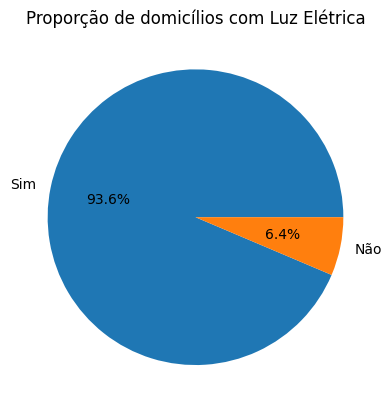

In [ ]:
# Simplificando valores
df['luz_eletrica_simplificado'] = df['luz_eletrica'].map({
    '1': 'Sim',
    'True': 'Sim',
    '0': 'Não',
    'False': 'Não'
})

# Contagem correta
contagem_luz = df['luz_eletrica_simplificado'].value_counts()

# Gráfico de pizza
contagem_luz.plot.pie(autopct='%1.1f%%', labels=contagem_luz.index)
plt.title('Proporção de domicílios com Luz Elétrica')
plt.ylabel('')
plt.show()

### **Análise da consistência do campo `familia_beneficiaria_auxilio_brasil`**

Realizei a análise desse campo para verificar se existem inconsistências semelhantes às observadas em outros campos booleanos.

In [ ]:
# Valores únicos no campo 'familia_beneficiaria_auxilio_brasil'
valores_unicos_auxilio = df['familia_beneficiaria_auxilio_brasil'].unique()
print(f"Valores únicos em 'familia_beneficiaria_auxilio_brasil': {valores_unicos_auxilio}")

# Contagem dos valores únicos
contagem_auxilio = df['familia_beneficiaria_auxilio_brasil'].value_counts()
print("\nContagem de cada valor encontrado:")
print(contagem_auxilio)

# Verificando tipos dos valores únicos
print("\nTipos dos valores únicos encontrados:")
for valor in valores_unicos_auxilio:
    print(f"Valor: {valor}, Tipo: {type(valor)}")

### **Análise da consistência do campo `crianca_matriculada_creche_pre_escola`**

Realizei também a análise desse campo para verificar se existem inconsistências de valores misturando tipos numéricos e booleanos.

In [ ]:
# Valores únicos em 'crianca_matriculada_creche_pre_escola'
valores_unicos_creche = df['crianca_matriculada_creche_pre_escola'].unique()
print(f"Valores únicos em 'crianca_matriculada_creche_pre_escola': {valores_unicos_creche}")

# Contagem dos valores únicos
contagem_creche = df['crianca_matriculada_creche_pre_escola'].value_counts()
print("\nContagem de cada valor encontrado:")
print(contagem_creche)

# Analisando tipos dos valores únicos
print("\nTipos dos valores únicos encontrados:")
for valor in valores_unicos_creche:
    print(f"Valor: {valor}, Tipo: {type(valor)}")

Mais uma vez, constatei que o campo apresenta valores numéricos (`0`, `1`) misturados com valores booleanos (`True/False`). Como observado anteriormente, essa inconsistência gera dificuldade em análises dos dados.

Vou manter a mesma forma de padronizacao de armazenamento para garantir a integridade e consistência da análise dos dados posteriormente.

## **Transformacoes com o DBT**

###1.   Padronização de Datas

```
SELECT data_nascimento
FROM public.mart_dados_finais
WHERE data_nascimento IS NOT NULL
ORDER BY data_nascimento DESC
LIMIT 10;
```

## ⚙ **Processo de Transformação**
### 🔹 **1. Staging (`stg_dados_brutos.sql`)**
- Carrega os dados crus no banco de dados (`public.dados_brutos`).
- Remove espaços extras e caracteres especiais.

### 🔹 **2. Intermediário (`int_tratamento.sql`)**
- Normaliza os tipos de dados (`obito`, `luz_eletrica`, `familia_beneficiaria_auxilio_brasil`, etc.).
- Converte datas para um formato único (`YYYY-MM-DD`).
- Substitui valores inconsistentes por `NULL` ou valores padrões.

### 🔹 **3. Mart Final (`mart_dados_finais.sql`)**
- Filtra e mantém apenas as colunas relevantes para análise.
- Garante que todos os dados estejam prontos para consumo.
